<a href="https://colab.research.google.com/github/nithinkalyan1708/Intergrating-Project/blob/main/Internship_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank Customer Churn Model

The objective is to predict the customers who are at risk at terminating their  relationship with the bank.

 https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

Import the Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Import data

In [ ]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

Describe the data

In [ ]:
df.describe

<bound method NDFrame.describe of       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  Num Of Products  Has Credit Card  Is Active Memb

In [ ]:
df.shape

(10000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


Data Visualization

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<Axes: >

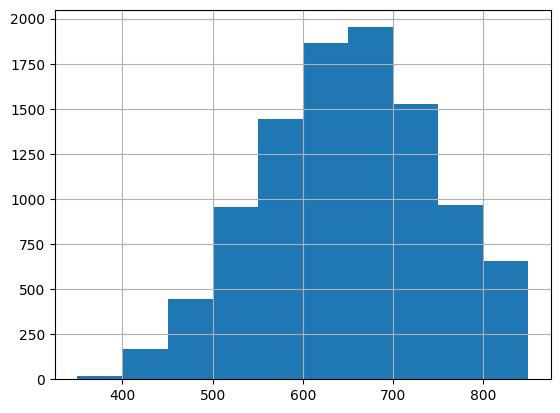

In [ ]:
df['CreditScore'].hist()

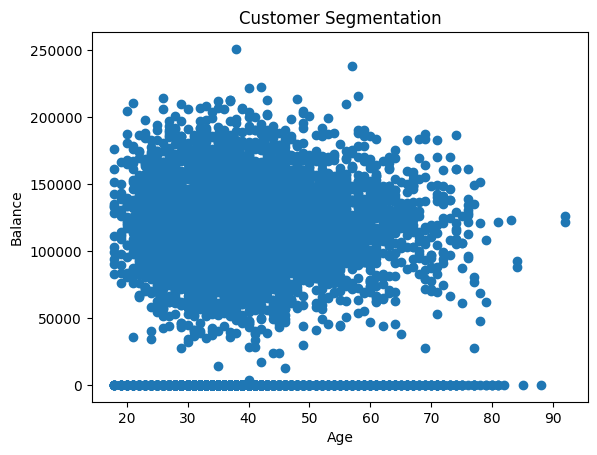

In [ ]:
plt.scatter(df['Age'],df['Balance'])
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

Data Preprocessing

In [ ]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])




X = df.drop('Surname', axis=1)
y = df['Surname']

Define Target Variable (y) and Feature Variables (X)

In [ ]:
X = df[['CreditScore', 'Balance',  'Estimated Salary']]
y = df['Age']

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)



In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


# Step 6 : train or fit model
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([39.0541033 , 38.55276235, 38.59233209, ..., 38.49372242,
       38.51388717, 39.09920899])

Model Evaluation

In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
mean_absolute_error(y_test,y_pred)

7.796387549943597

In [ ]:
r2_score(y_test,y_pred)

0.0006836162054020267